<a href="https://colab.research.google.com/github/maupnx/spotify_public_api_data/blob/main/spotify_api_artistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 4.5 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id='8187b63e852746968c5a65a87ecfcaea', client_secret='454c63a5c83342c69a36b8f7d6bd557b')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Set up Spotify API credentials
client_id = 'your_client_id'
client_secret = 'your_client_secret'
client_credentials_manager = SpotifyClientCredentials(client_id='8187b63e852746968c5a65a87ecfcaea', client_secret='454c63a5c83342c69a36b8f7d6bd557b')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Specify the artist URI or URL
artist_link = "https://open.spotify.com/artist/72f733zGuCPEzCSLs9wOVi"
artist_id = artist_link.split("/")[-1]

# Get the albums for the artist
albums = sp.artist_albums(artist_id=artist_id, album_type='album')

# Create a list to store audio features dictionaries
audio_features_list = []

# Iterate through albums
for album in albums['items']:
    album_tracks = sp.album_tracks(album['id'])

    # Iterate through tracks in the album
    for track_info in album_tracks['items']:
        track_name = track_info["name"]
        track_uri = track_info["uri"]

        # Get audio features for the track
        audio_features = sp.audio_features(track_uri)[0]

        # Get release date for the album
        release_date = album['release_date']

        # Store audio features and release date in the list as a dictionary
        audio_features_dict = {
            "Track Name": track_name,
            "Release Date": release_date,
            **audio_features  # Unpack audio features dictionary
        }
        audio_features_list.append(audio_features_dict)

# Create a DataFrame from the list
df = pd.DataFrame(audio_features_list)

# Save the DataFrame to a CSV file
csv_filename = "audio_features.csv"
df.to_csv(csv_filename, index=False)

print(f"Audio features data saved to {csv_filename}")




Audio features data saved to audio_features.csv


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

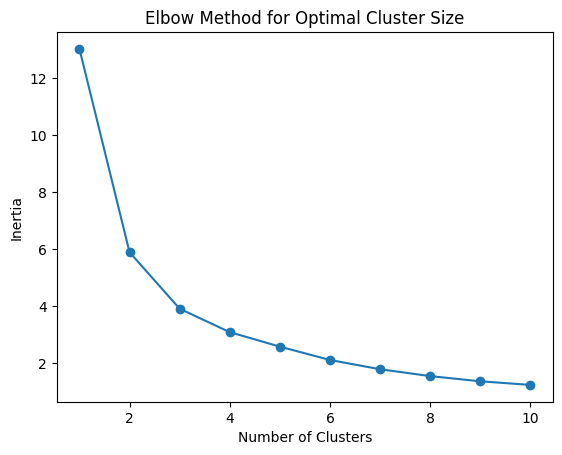

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your CSV file into a Pandas DataFrame
df = pd.read_csv('audio_features.csv')

# Select the features for clustering
X = df[['danceability', 'energy']]

# Create an empty list to store the inertia (sum of squared distances to the closest centroid) for different cluster sizes
inertia = []

# Define a range of cluster sizes (you can adjust this range based on your data)
cluster_range = range(1, 11)

# Perform KMeans clustering for each cluster size and store the inertia
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Size')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


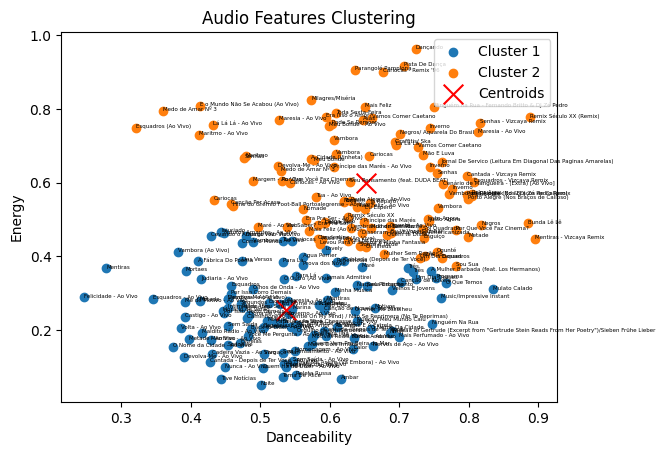

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your CSV file into a Pandas DataFrame
df = pd.read_csv('audio_features.csv')

# Select the features for clustering
X = df[['danceability', 'energy']]

# Choose the number of clusters (you've determined it's 7)
num_clusters = 2

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Create a scatter plot for 'Danceability' vs 'Energy' with color-coded clusters
for cluster_number in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster_number]
    plt.scatter(cluster_data['danceability'], cluster_data['energy'], label=f'Cluster {cluster_number + 1}')

    # Annotate each point with its track name
    for index, row in cluster_data.iterrows():
        plt.annotate(row['Track Name'], (row['danceability'], row['energy']), fontsize=4)

# Plot the centroids (cluster centers)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')

# Set plot labels and title
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Audio Features Clustering')
plt.legend()
plt.show()


In [ ]:
# Save the DataFrame to a new CSV file with the added cluster column
df.to_csv("clustered_audio_features.csv", index=False)

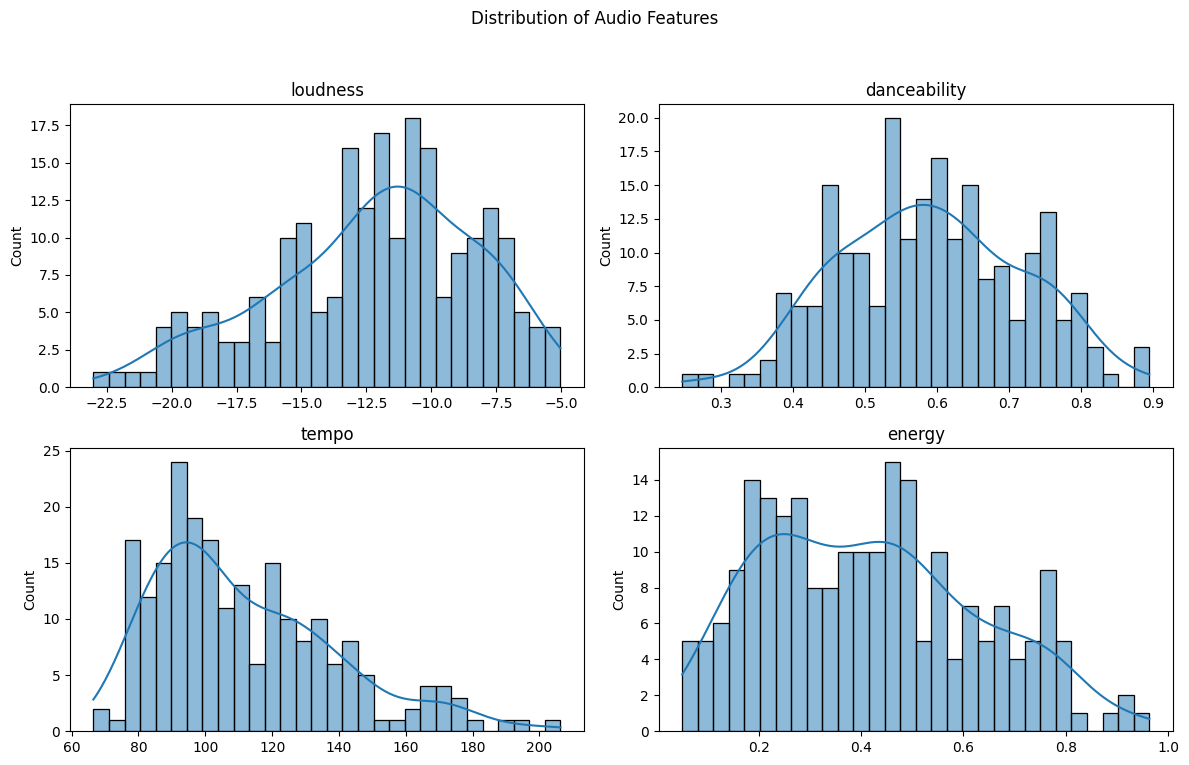

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
csv_filename = "audio_features.csv"
df = pd.read_csv(csv_filename)

# Select the columns for distribution
columns_for_distribution = ['loudness', 'danceability', 'tempo', 'energy']

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Distribution of Audio Features')

# Create distribution plots for each variable
for i, column in enumerate(columns_for_distribution):
    row, col = divmod(i, 2)
    sns.histplot(df[column], kde=True, ax=axes[row, col], bins=30)
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the CSV file into a Pandas DataFrame
csv_filename = "audio_features.csv"
df = pd.read_csv(csv_filename)

# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract the release year
df['release_year'] = df['release_date'].dt.year

# Select the columns for linear regression
columns_for_regression = ['danceability', 'release_year']

# Filter out rows with missing values in the selected columns
df_filtered = df[columns_for_regression].dropna()

# Set up the figure
plt.figure(figsize=(10, 6))
plt.title('Linear Regression: Danceability over the Years')

# Perform linear regression
slope, intercept, _, _, _ = linregress(df_filtered['release_year'], df_filtered['danceability'])

# Create a scatter plot
sns.scatterplot(x='release_year', y='danceability', data=df_filtered, label='Data points')

# Plot the regression line
plt.plot(df_filtered['release_year'], intercept + slope * df_filtered['release_year'],
         color='red', label=f'Linear Regression Line (slope={slope:.4f})')

plt.xlabel('Release Year')
plt.ylabel('Danceability')
plt.legend()
plt.show()


In [ ]:
# Display all column names in the DataFrame
print(df.columns)


Index(['Track Name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')


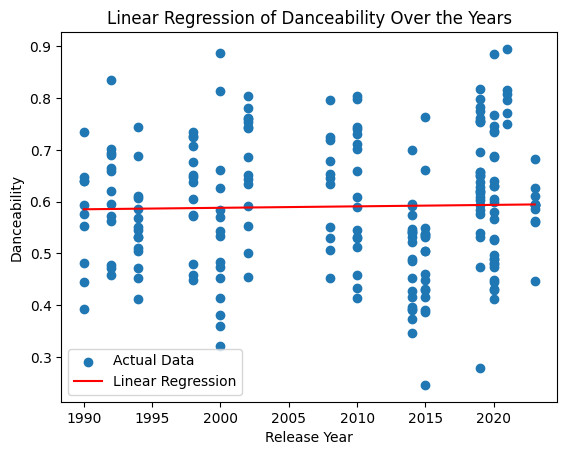

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
csv_filename = "audio_features.csv"
df = pd.read_csv(csv_filename)

# Convert the 'Release Date' column to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Check if 'Release Date' is present and contains valid datetime values
if 'Release Date' in df.columns and pd.api.types.is_datetime64_ns_dtype(df['Release Date']):
    # Extract the year from the 'Release Date' and create a new column
    df['release_year'] = df['Release Date'].dt.year

    # Select the variable (feature) for linear regression (e.g., 'danceability')
    feature_variable = 'danceability'

    # Reshape the data for scikit-learn
    X = df['release_year'].values.reshape(-1, 1)
    y = df[feature_variable].values

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions using the model
    predictions = model.predict(X)

    # Plot the linear regression line
    plt.scatter(df['release_year'], df[feature_variable], label='Actual Data')
    plt.plot(df['release_year'], predictions, color='red', label='Linear Regression')
    plt.xlabel('Release Year')
    plt.ylabel(feature_variable.capitalize())  # Use the feature variable name as the ylabel
    plt.title(f'Linear Regression of {feature_variable.capitalize()} Over the Years')
    plt.legend()
    plt.show()
else:
    print("Error: 'Release Date' column is missing or does not contain valid datetime values.")





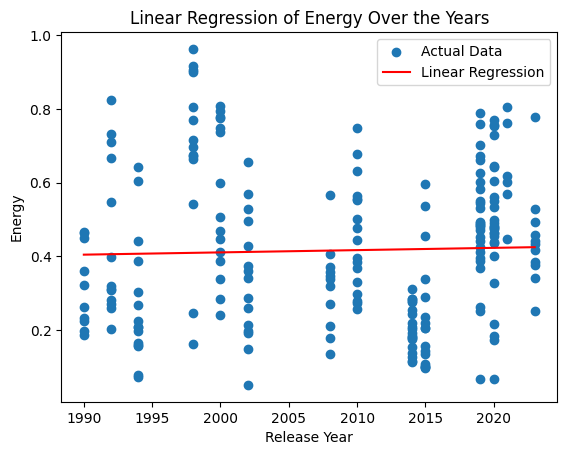

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
csv_filename = "audio_features.csv"
df = pd.read_csv(csv_filename)

# Convert the 'Release Date' column to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Check if 'Release Date' is present and contains valid datetime values
if 'Release Date' in df.columns and pd.api.types.is_datetime64_ns_dtype(df['Release Date']):
    # Extract the year from the 'Release Date' and create a new column
    df['release_year'] = df['Release Date'].dt.year

    # Select the variable (feature) for linear regression (e.g., 'energy')
    feature_variable = 'energy'

    # Reshape the data for scikit-learn
    X = df['release_year'].values.reshape(-1, 1)
    y = df[feature_variable].values

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions using the model
    predictions = model.predict(X)

    # Plot the linear regression line
    plt.scatter(df['release_year'], df[feature_variable], label='Actual Data')
    plt.plot(df['release_year'], predictions, color='red', label='Linear Regression')
    plt.xlabel('Release Year')
    plt.ylabel(feature_variable.capitalize())  # Use the feature variable name as the ylabel
    plt.title(f'Linear Regression of {feature_variable.capitalize()} Over the Years')
    plt.legend()
    plt.show()
else:
    print("Error: 'Release Date' column is missing or does not contain valid datetime values.")


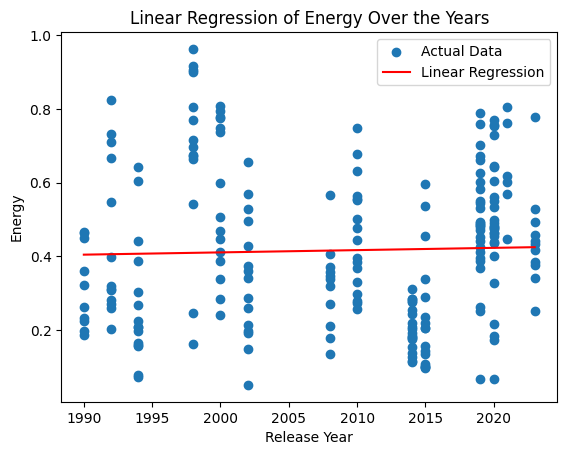

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
csv_filename = "audio_features.csv"
df = pd.read_csv(csv_filename)

# Convert the 'Release Date' column to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Check if 'Release Date' is present and contains valid datetime values
if 'Release Date' in df.columns and pd.api.types.is_datetime64_ns_dtype(df['Release Date']):
    # Extract the year from the 'Release Date' and create a new column
    df['release_year'] = df['Release Date'].dt.year

    # Select the variable (feature) for linear regression (e.g., 'energy')
    feature_variable = 'energy'

    # Reshape the data for scikit-learn
    X = df['release_year'].values.reshape(-1, 1)
    y = df[feature_variable].values

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions using the model
    predictions = model.predict(X)

    # Plot the linear regression line
    plt.scatter(df['release_year'], df[feature_variable], label='Actual Data')
    plt.plot(df['release_year'], predictions, color='red', label='Linear Regression')
    plt.xlabel('Release Year')
    plt.ylabel(feature_variable.capitalize())  # Use the feature variable name as the ylabel
    plt.title(f'Linear Regression of {feature_variable.capitalize()} Over the Years')
    plt.legend()
    plt.show()
else:
    print("Error: 'Release Date' column is missing or does not contain valid datetime values.")

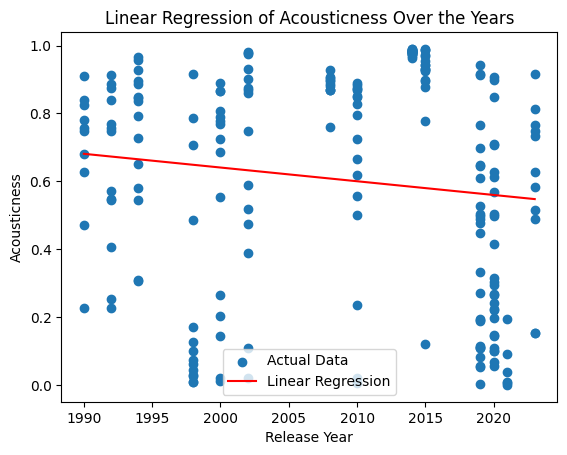

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
csv_filename = "audio_features.csv"
df = pd.read_csv(csv_filename)

# Convert the 'Release Date' column to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Check if 'Release Date' is present and contains valid datetime values
if 'Release Date' in df.columns and pd.api.types.is_datetime64_ns_dtype(df['Release Date']):
    # Extract the year from the 'Release Date' and create a new column
    df['release_year'] = df['Release Date'].dt.year

    # Select the variable (feature) for linear regression (e.g., 'energy')
    feature_variable = 'acousticness'

    # Reshape the data for scikit-learn
    X = df['release_year'].values.reshape(-1, 1)
    y = df[feature_variable].values

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions using the model
    predictions = model.predict(X)

    # Plot the linear regression line
    plt.scatter(df['release_year'], df[feature_variable], label='Actual Data')
    plt.plot(df['release_year'], predictions, color='red', label='Linear Regression')
    plt.xlabel('Release Year')
    plt.ylabel(feature_variable.capitalize())  # Use the feature variable name as the ylabel
    plt.title(f'Linear Regression of {feature_variable.capitalize()} Over the Years')
    plt.legend()
    plt.show()
else:
    print("Error: 'Release Date' column is missing or does not contain valid datetime values.")

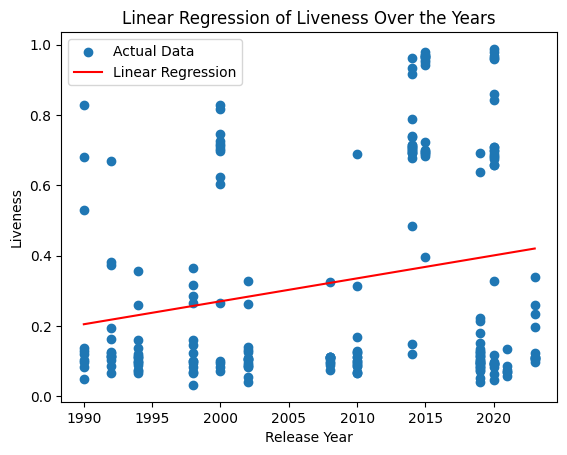

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
csv_filename = "audio_features.csv"
df = pd.read_csv(csv_filename)

# Convert the 'Release Date' column to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Check if 'Release Date' is present and contains valid datetime values
if 'Release Date' in df.columns and pd.api.types.is_datetime64_ns_dtype(df['Release Date']):
    # Extract the year from the 'Release Date' and create a new column
    df['release_year'] = df['Release Date'].dt.year

    # Select the variable (feature) for linear regression (e.g., 'energy')
    feature_variable = 'liveness'

    # Reshape the data for scikit-learn
    X = df['release_year'].values.reshape(-1, 1)
    y = df[feature_variable].values

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions using the model
    predictions = model.predict(X)

    # Plot the linear regression line
    plt.scatter(df['release_year'], df[feature_variable], label='Actual Data')
    plt.plot(df['release_year'], predictions, color='red', label='Linear Regression')
    plt.xlabel('Release Year')
    plt.ylabel(feature_variable.capitalize())  # Use the feature variable name as the ylabel
    plt.title(f'Linear Regression of {feature_variable.capitalize()} Over the Years')
    plt.legend()
    plt.show()
else:
    print("Error: 'Release Date' column is missing or does not contain valid datetime values.")

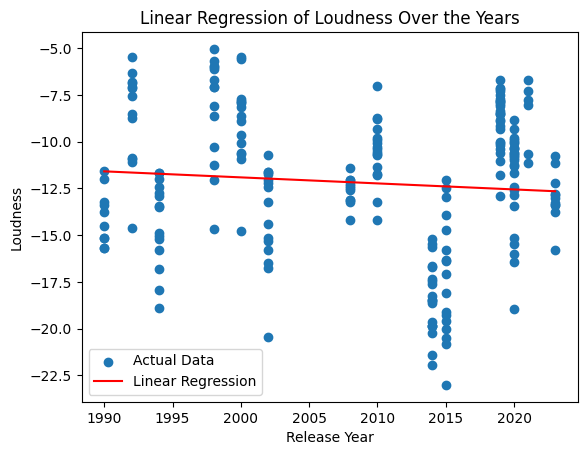

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
csv_filename = "audio_features.csv"
df = pd.read_csv(csv_filename)

# Convert the 'Release Date' column to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Check if 'Release Date' is present and contains valid datetime values
if 'Release Date' in df.columns and pd.api.types.is_datetime64_ns_dtype(df['Release Date']):
    # Extract the year from the 'Release Date' and create a new column
    df['release_year'] = df['Release Date'].dt.year

    # Select the variable (feature) for linear regression (e.g., 'energy')
    feature_variable = 'loudness'

    # Reshape the data for scikit-learn
    X = df['release_year'].values.reshape(-1, 1)
    y = df[feature_variable].values

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions using the model
    predictions = model.predict(X)

    # Plot the linear regression line
    plt.scatter(df['release_year'], df[feature_variable], label='Actual Data')
    plt.plot(df['release_year'], predictions, color='red', label='Linear Regression')
    plt.xlabel('Release Year')
    plt.ylabel(feature_variable.capitalize())  # Use the feature variable name as the ylabel
    plt.title(f'Linear Regression of {feature_variable.capitalize()} Over the Years')
    plt.legend()
    plt.show()
else:
    print("Error: 'Release Date' column is missing or does not contain valid datetime values.")

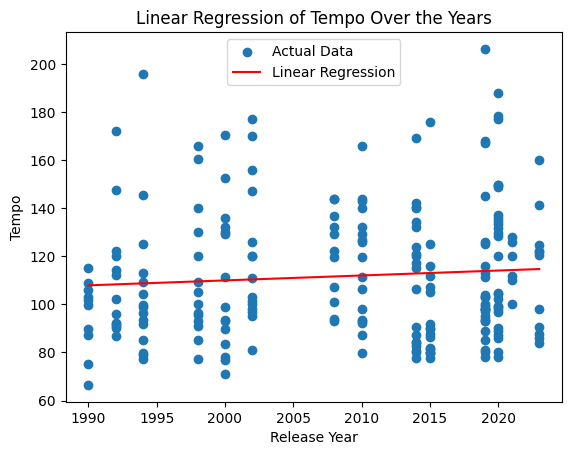

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
csv_filename = "audio_features.csv"
df = pd.read_csv(csv_filename)

# Convert the 'Release Date' column to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Check if 'Release Date' is present and contains valid datetime values
if 'Release Date' in df.columns and pd.api.types.is_datetime64_ns_dtype(df['Release Date']):
    # Extract the year from the 'Release Date' and create a new column
    df['release_year'] = df['Release Date'].dt.year

    # Select the variable (feature) for linear regression (e.g., 'energy')
    feature_variable = 'tempo'

    # Reshape the data for scikit-learn
    X = df['release_year'].values.reshape(-1, 1)
    y = df[feature_variable].values

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions using the model
    predictions = model.predict(X)

    # Plot the linear regression line
    plt.scatter(df['release_year'], df[feature_variable], label='Actual Data')
    plt.plot(df['release_year'], predictions, color='red', label='Linear Regression')
    plt.xlabel('Release Year')
    plt.ylabel(feature_variable.capitalize())  # Use the feature variable name as the ylabel
    plt.title(f'Linear Regression of {feature_variable.capitalize()} Over the Years')
    plt.legend()
    plt.show()
else:
    print("Error: 'Release Date' column is missing or does not contain valid datetime values.")